In [38]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("university_admission.csv")

In [25]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


In [26]:
df.dropna(inplace=True)

In [27]:
print(df.columns.tolist())

['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admission']


In [28]:
X = df.drop(['Chance_of_Admission'], axis=1)
y = df['Chance_of_Admission']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state =42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [37]:
print("\nEvaluation Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Evaluation Metrics:
R² Score: 0.8317
MAE: 0.0407
MSE: 0.0032
RMSE: 0.0569


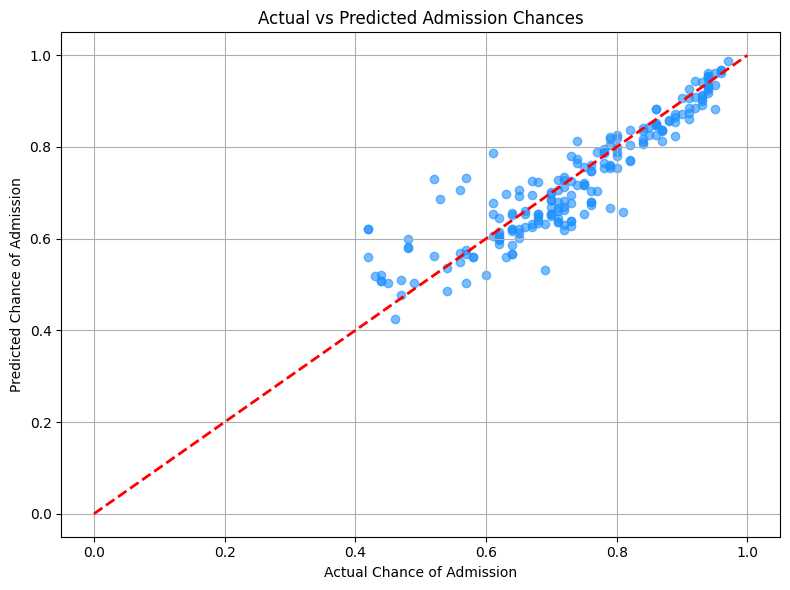

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.title("Actual vs Predicted Admission Chances")
plt.grid(True)
plt.tight_layout()
plt.show()